<a href="https://colab.research.google.com/github/udayan35/Finance-News-Sentiment-Analysis/blob/main/FinancialTextSentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers feedparser

In [ ]:
import feedparser
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="ProsusAI/finbert")


Device set to use cpu


In [ ]:
ticker='META'
keyword='meta'
rss_url=f'http://finance.yahoo.com/rss/headline?s={ticker}'

feed=feedparser.parse(rss_url)
positive,negative,neutral=0,0,0
total_score=0
num_articles=0

In [ ]:
type(feed)

feedparser.util.FeedParserDict

In [ ]:
for i,entry in enumerate(feed.entries):
  if keyword.lower() not in entry.summary.lower():
    continue
  print(f'Title:{entry.title}')
  print(f'Link:{entry.link}')
  print(f'Published:{entry.published}')
  print(f'Summary:{entry.summary}')

  sentiment=pipe(entry.summary)[0]

  print(f'Sentiment:{sentiment}')
  print(f'Score:{sentiment["score"]}')
  print('-'*40)

  if sentiment['label']=='positive':
    total_score+=sentiment['score']
    num_articles+=1
    positive+=1
  elif sentiment['label']=='negative':
    total_score-=sentiment['score']
    num_articles+=1
    negative+=1
  else:
    neutral+=1

Title:'Zuck Reached Out And We Chatted': Meta Lures Seattle AI Founder With $100M-Plus Offer To Join Its Superintelligence Dream Team
Link:https://finance.yahoo.com/news/zuck-reached-chatted-meta-lures-163153693.html?.tsrc=rss
Published:Sat, 19 Jul 2025 16:31:53 +0000
Summary:Matt Deitke, co-founder of Seattle-based AI startup Vercept, has joined Meta's (NASDAQ:META) Superintelligence Lab after receiving a direct offer from CEO Mark Zuckerberg. Deitke described the initiative as "the most exciting bet I've seen in tech history," signaling Meta's bold ambitions in artificial general intelligence, GeekWire reports. Deitke brings advanced expertise in embodied AI and 3D computer vision, having previously worked at the Allen Institute for AI and studied at the University
Sentiment:{'label': 'neutral', 'score': 0.8429414629936218}
Score:0.8429414629936218
----------------------------------------
Title:Think It's Too Late to Buy This Leading Tech Stock? Here's the Biggest Reason Why There's 

In [ ]:
overall_score=total_score/num_articles
print(f'Overall Sentiment:{"Positive" if overall_score>0.15 else "Negative" if overall_score<=-0.15 else "Neutral"} {overall_score}')

Overall Sentiment:Positive 0.9230180382728577


In [ ]:
print(f'Positive:{positive}')
print(f'Negative:{negative}')
print(f'Neutral:{neutral}')

Positive:4
Negative:0
Neutral:6


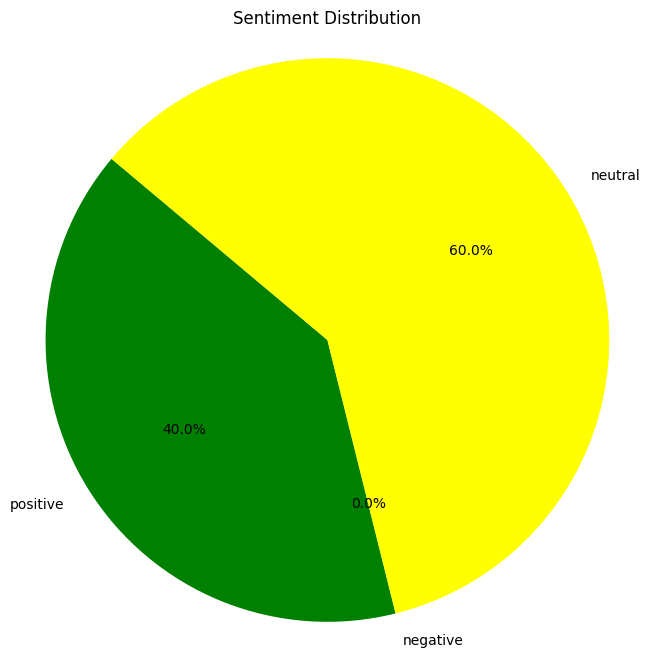

In [ ]:
import matplotlib.pyplot as plt

sentiment_counts = {
    'positive': positive,
    'negative': negative,
    'neutral': neutral
}

labels = sentiment_counts.keys()
sizes = sentiment_counts.values()
colors = ['green', 'red', 'yellow']

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()